# Generators

In [6]:
from pycomplexnet import generators, network
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import networkx as nx

## Random graphs

A random graph can be created as follows.

In [25]:
RANDOM_NET_N_NODES = 100
RANDOM_NET_P = 0.1
net = generators.random_network(RANDOM_NET_N_NODES,RANDOM_NET_P)

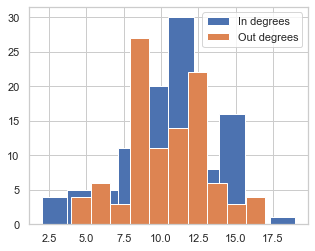

In [26]:
plt.rcParams['figure.figsize'] = (5,4)
plt.hist(net.get_in_degrees().tolist()[0], label='In degrees')
plt.hist(net.get_out_degrees().tolist()[0], label='Out degrees')
plt.legend();

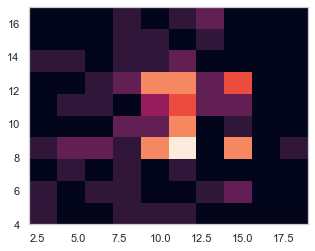

In [27]:
plt.rcParams['figure.figsize'] = (5,4)
plt.hist2d(x=net.get_in_degrees().tolist()[0], y=net.get_out_degrees().tolist()[0]);

We can also visualise the network using `NetworkX`, but take into account the limitations of visualising large complex graphs.

In [28]:
net.adjacency_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

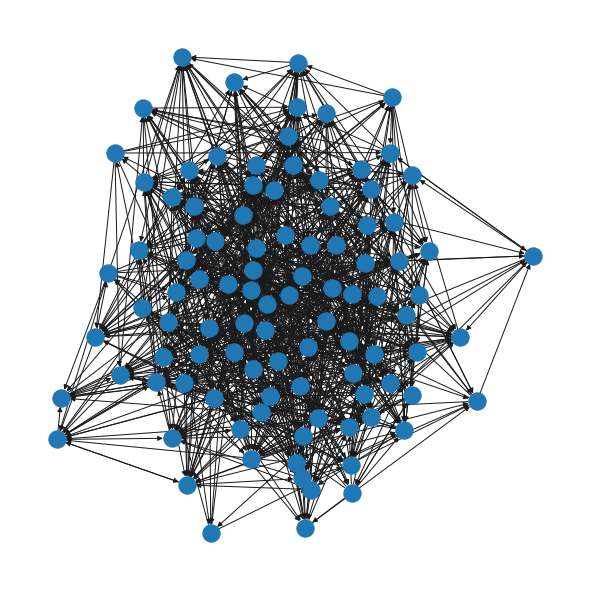

In [29]:
plt.rcParams['figure.figsize'] = (8,8)
G = nx.from_scipy_sparse_matrix(net.adjacency_matrix, create_using=nx.DiGraph)

# Plot it
nx.draw(G, with_labels=False)
plt.show()

And see how the distribution of distances resembles the shape of an exponential distribution.

In [30]:
plt.rcParams['figure.figsize'] = (5,4)
min_distances = [
    net.get_distance(i,j) for (i,j) in itertools.product(range(0,RANDOM_NET_N_NODES),range(0,RANDOM_NET_N_NODES))
]

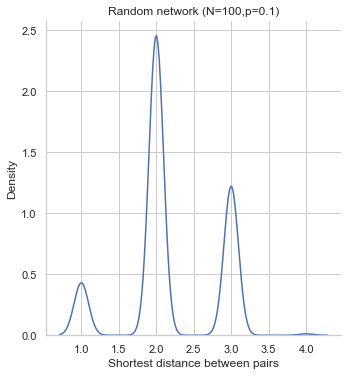

In [33]:
g = sns.displot([d for d in min_distances if d is not np.Inf], kind='kde')
g.set(xlabel='Shortest distance between pairs',
     title="Random network (N={},p={})".format(RANDOM_NET_N_NODES,RANDOM_NET_P));

## Star network

A star network is created with a symmetric adjacency matrix, so we can deal with it as non directed.

In [19]:
N_NODES = 100
star_net = generators.star_network(N_NODES,1)

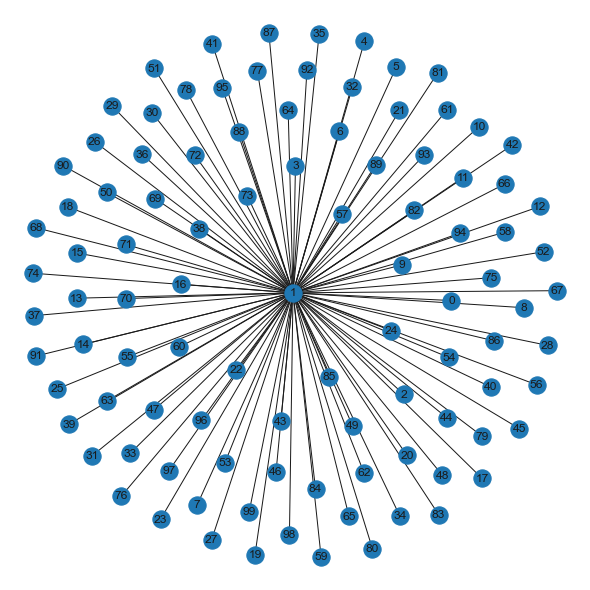

In [20]:
plt.rcParams['figure.figsize'] = (8,8)
G = nx.from_scipy_sparse_matrix(star_net.adjacency_matrix)

# Plot it
nx.draw(G, with_labels=True)
plt.show()

We can see that all nodes but one have degree 1, and the center node has degree equal to the number of nodes minus one.

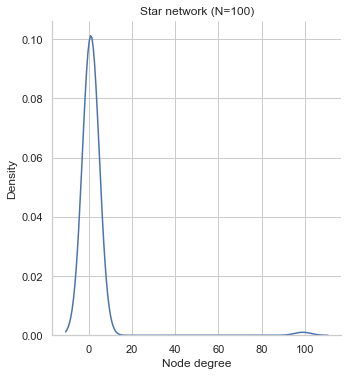

In [22]:
plt.rcParams['figure.figsize'] = (5,4)

g = sns.displot(star_net.get_in_degrees().tolist()[0], kind='kde')
g.set(xlabel='Node degree',title='Star network (N=100)');

We can also check that the distance between ny pair of nodes not including the center is 2.

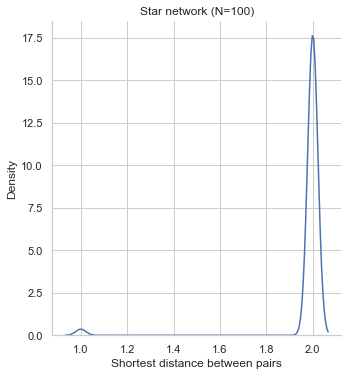

In [24]:
plt.rcParams['figure.figsize'] = (5,4)
distances_to_center = [
    star_net.get_distance(i,j) for (i,j) in itertools.product(range(0,N_NODES),range(0,N_NODES))
]
g = sns.displot(
    distances_to_center, kind='kde')
g.set(xlabel='Shortest distance between pairs',
      title='Star network (N={})'.format(N_NODES));

## Zachary Karate Club

In [2]:
zkc_net = generators.zachary_karate_club_77()

/Users/jadianes/Documents/workspace/pycomplexnet/venv/lib/python3.9/site-packages/pycomplexnet/generators.py:28: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  edges_df = pd.read_csv(io.StringIO(edges_file), sep='\s', header=None, names=['from','to'])


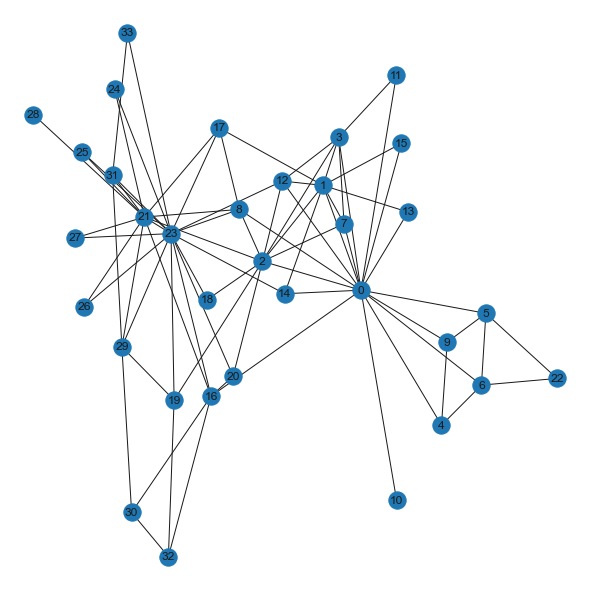

In [3]:
plt.rcParams['figure.figsize'] = (8,8)
G = nx.from_scipy_sparse_matrix(zkc_net.adjacency_matrix)

# Plot it
nx.draw(G, with_labels=True)
plt.show()

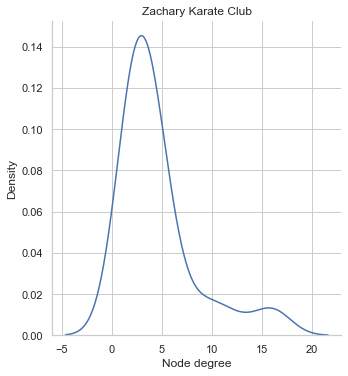

In [16]:
plt.rcParams['figure.figsize'] = (5,4)

g = sns.displot(
    zkc_net.get_in_degrees().tolist()[0], 
    kind='kde')
g.set(
    xlabel='Node degree',
    title='Zachary Karate Club'
);

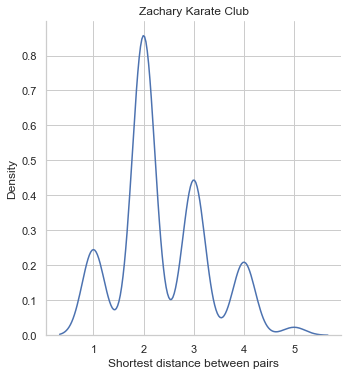

In [11]:
plt.rcParams['figure.figsize'] = (4,4)
distances_to_center = [
    zkc_net.get_distance(i,j) for (i,j) in itertools.product(range(0,33),range(0,33))
]
g = sns.displot(
    distances_to_center, 
    kind="kde")
g.set(xlabel='Shortest distance between pairs',
      title="Zachary Karate Club");